<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/HM_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 4.1

##Graph and graph modeling

Generate a basic graph

Create a simple rng linear neural net

Graph the nodes of the nueral net to visibly see the weights

Basic graph

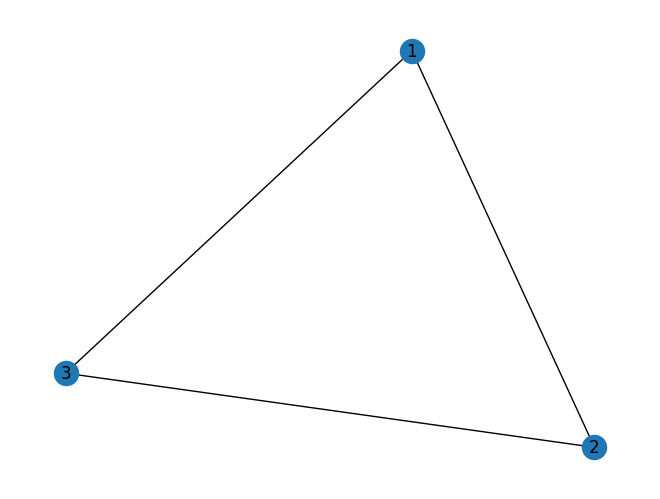

In [2]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(1, 3), (2, 3)])

# Draw the graph
nx.draw(G, with_labels=True)

Basic nueral net

In [5]:
import torch
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NueralNet(nn.Module):
  def __init__(self, input = (32, 32), hidden = (64, 128), output = 3):
    super().__init__()

    self.linear_relu_stack = nn.Sequential(
        nn.Linear(input[1], hidden[0]),
        nn.ReLU(),
        nn.Linear(hidden[0], hidden[1]),
        nn.ReLU(),
        nn.Linear(hidden[1], output),
      )

  def forward(self, x):

    output = self.linear_relu_stack(x)
    return output

batch = 1
obs = 32
features = 5
classes = 3

linear_net = NueralNet(input = (obs, features), hidden=(5, 6), output=classes)

X = torch.rand(obs, features).to(device)
Y = torch.randint(0, classes, (obs,)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(linear_net.parameters(), lr=0.01)

y_pred = linear_net(X)

#y_pred = y_pred.argmax(1)
#y_pred = torch.nn.functional.one_hot(y_pred, num_classes=classes)
loss = loss_fn(y_pred, Y)
print(loss.item())

i = 0
tol = 10**-5
while loss.item() > tol and i < 10000:
  optimizer.zero_grad()  # Zero the gradients
  loss.backward()  # Compute gradients
  optimizer.step()

  y_pred = linear_net(X)
  loss = loss_fn(y_pred, Y)
  i += 1

print(loss.item())

Y_real = torch.nn.functional.one_hot(Y, num_classes=classes)
Y_pred = torch.nn.functional.one_hot(linear_net(X).argmax(1), num_classes=classes)

print(Y_real.numpy().T)
print(Y_pred.numpy().T)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_real, Y_pred))

Using cpu device
1.0904436111450195
9.998458153859247e-06
[[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1]
 [0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1]
 [0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]]
1.0


Graph

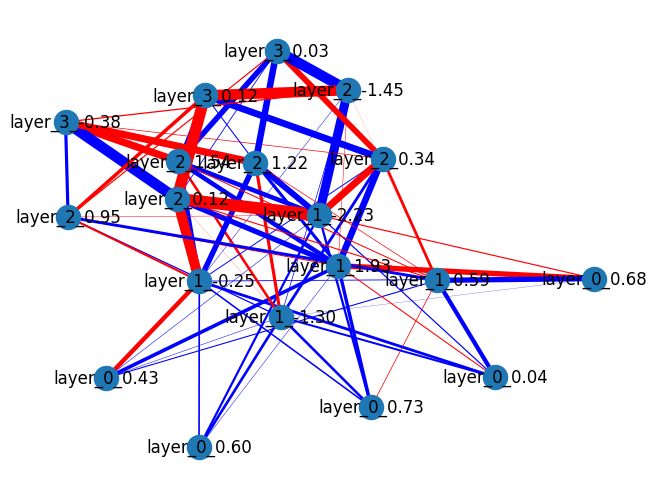

In [6]:
import torch
from torch import nn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def nn_graph(X0, model):
    weights = []
    layers = []
    layers.append(X0)

    # Separate weights and layers
    for i, p in enumerate(model.parameters()):
        if i % 2 == 0:
            weights.append(p.detach().cpu().numpy())
        else:
            layers.append(p.detach().cpu().numpy())

    #print("Weights:", weights)
    #print("Layers:", layers)

    G = nx.Graph()

    # Create nodes and edges
    for l in range(len(layers)):
        for i, lay1 in enumerate(layers[l]):
            node_name = f'layer_{l}_{lay1:.2f}'
            G.add_node(node_name, layer=f'layer {l}')
            if l > 0:
                for j, lay2 in enumerate(layers[l - 1]):
                    w = weights[l - 1][i, j]
                    color = 'b' if w > 0 else 'r'
                    G.add_edge(f'layer_{l-1}_{lay2:.2f}', node_name, weight=abs(w), color=color)
                    #print(f"Weight from layer {l-1}, node {j} to layer {l}, node {i}: {w}")

    # Extract color and weight attributes
    edge_colors = list(nx.get_edge_attributes(G, 'color').values())
    edge_weights = list(nx.get_edge_attributes(G, 'weight').values())

    # Position and draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color=edge_colors, width=edge_weights, with_labels=True)
    plt.show()

    return



linear_net = linear_net.cpu()

nn_graph(X[0].cpu(), model=linear_net)

Note that blue is positive, red is negative and magnitude of the weight corresponds to the width.